# Imports

In [73]:
import numpy as np
import pandas as pd
import geopandas as gpd
import libpysal.weights as weights
import pysal.explore as esda
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [74]:
raw_df = gpd.read_file("datasets/3_combined/df.gpkg")

In [75]:
df = raw_df.copy()

# Define outliers

In [76]:
def calculate_outliers(df, col):
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[col][(df[col] <= lower_bound) | (df[col] >= upper_bound)]
    return outliers

# Health

## Calculate outliers

In [77]:
vg_outliers = calculate_outliers(df, "very_good_health")
print(len(vg_outliers))

142


## Plot outliers

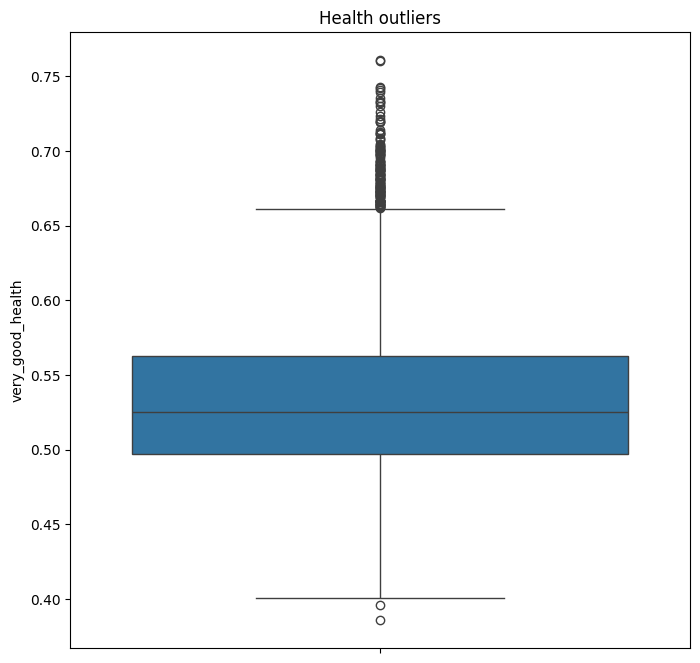

In [78]:
plt.figure(figsize=(8, 8))
sns.boxplot(y=df["very_good_health"])
plt.title("Health outliers")
plt.savefig("outputs/plots/health_outliers.png")

## Plot distribution

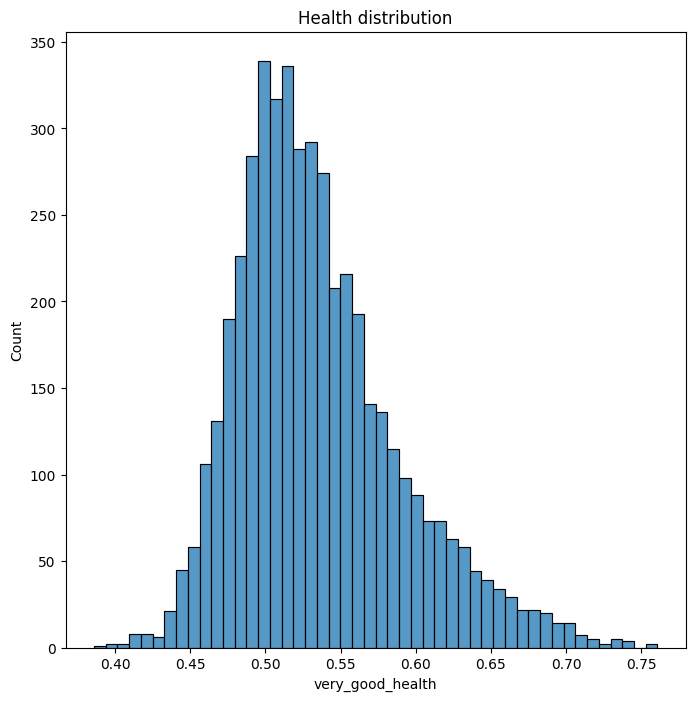

In [79]:
plt.figure(figsize=(8, 8))
sns.histplot(df["very_good_health"])
plt.title("Health distribution")
plt.savefig("outputs/plots/health_distribution.png")

# Greenspace

## Calculate outliers

In [80]:
gp_outliers = calculate_outliers(df, "greenspace_proportion")
print(len(gp_outliers))

304


## Plot outliers

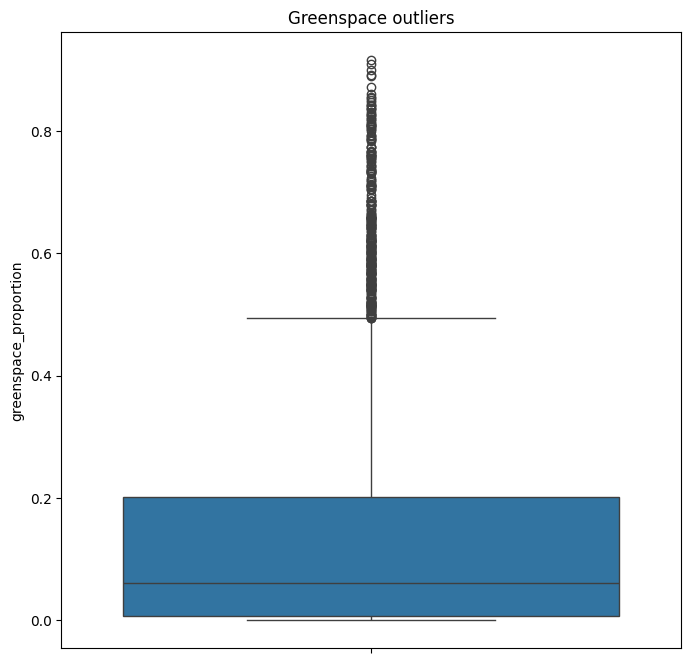

In [81]:
plt.figure(figsize=(8, 8))
sns.boxplot(df["greenspace_proportion"])
plt.title("Greenspace outliers")
plt.savefig("outputs/plots/greenspace_outliers.png")

## Plot distribution

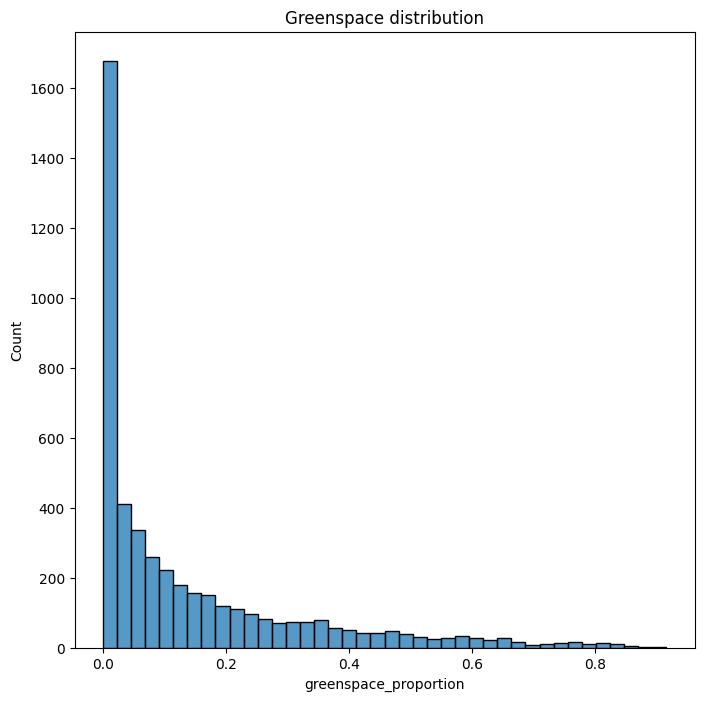

In [82]:
plt.figure(figsize=(8, 8))
sns.histplot(df["greenspace_proportion"])
plt.title("Greenspace distribution")
plt.savefig("outputs/plots/greenspace_distribution.png")

# Spatial autocorrelation

## Plot choropleth of very_good_health

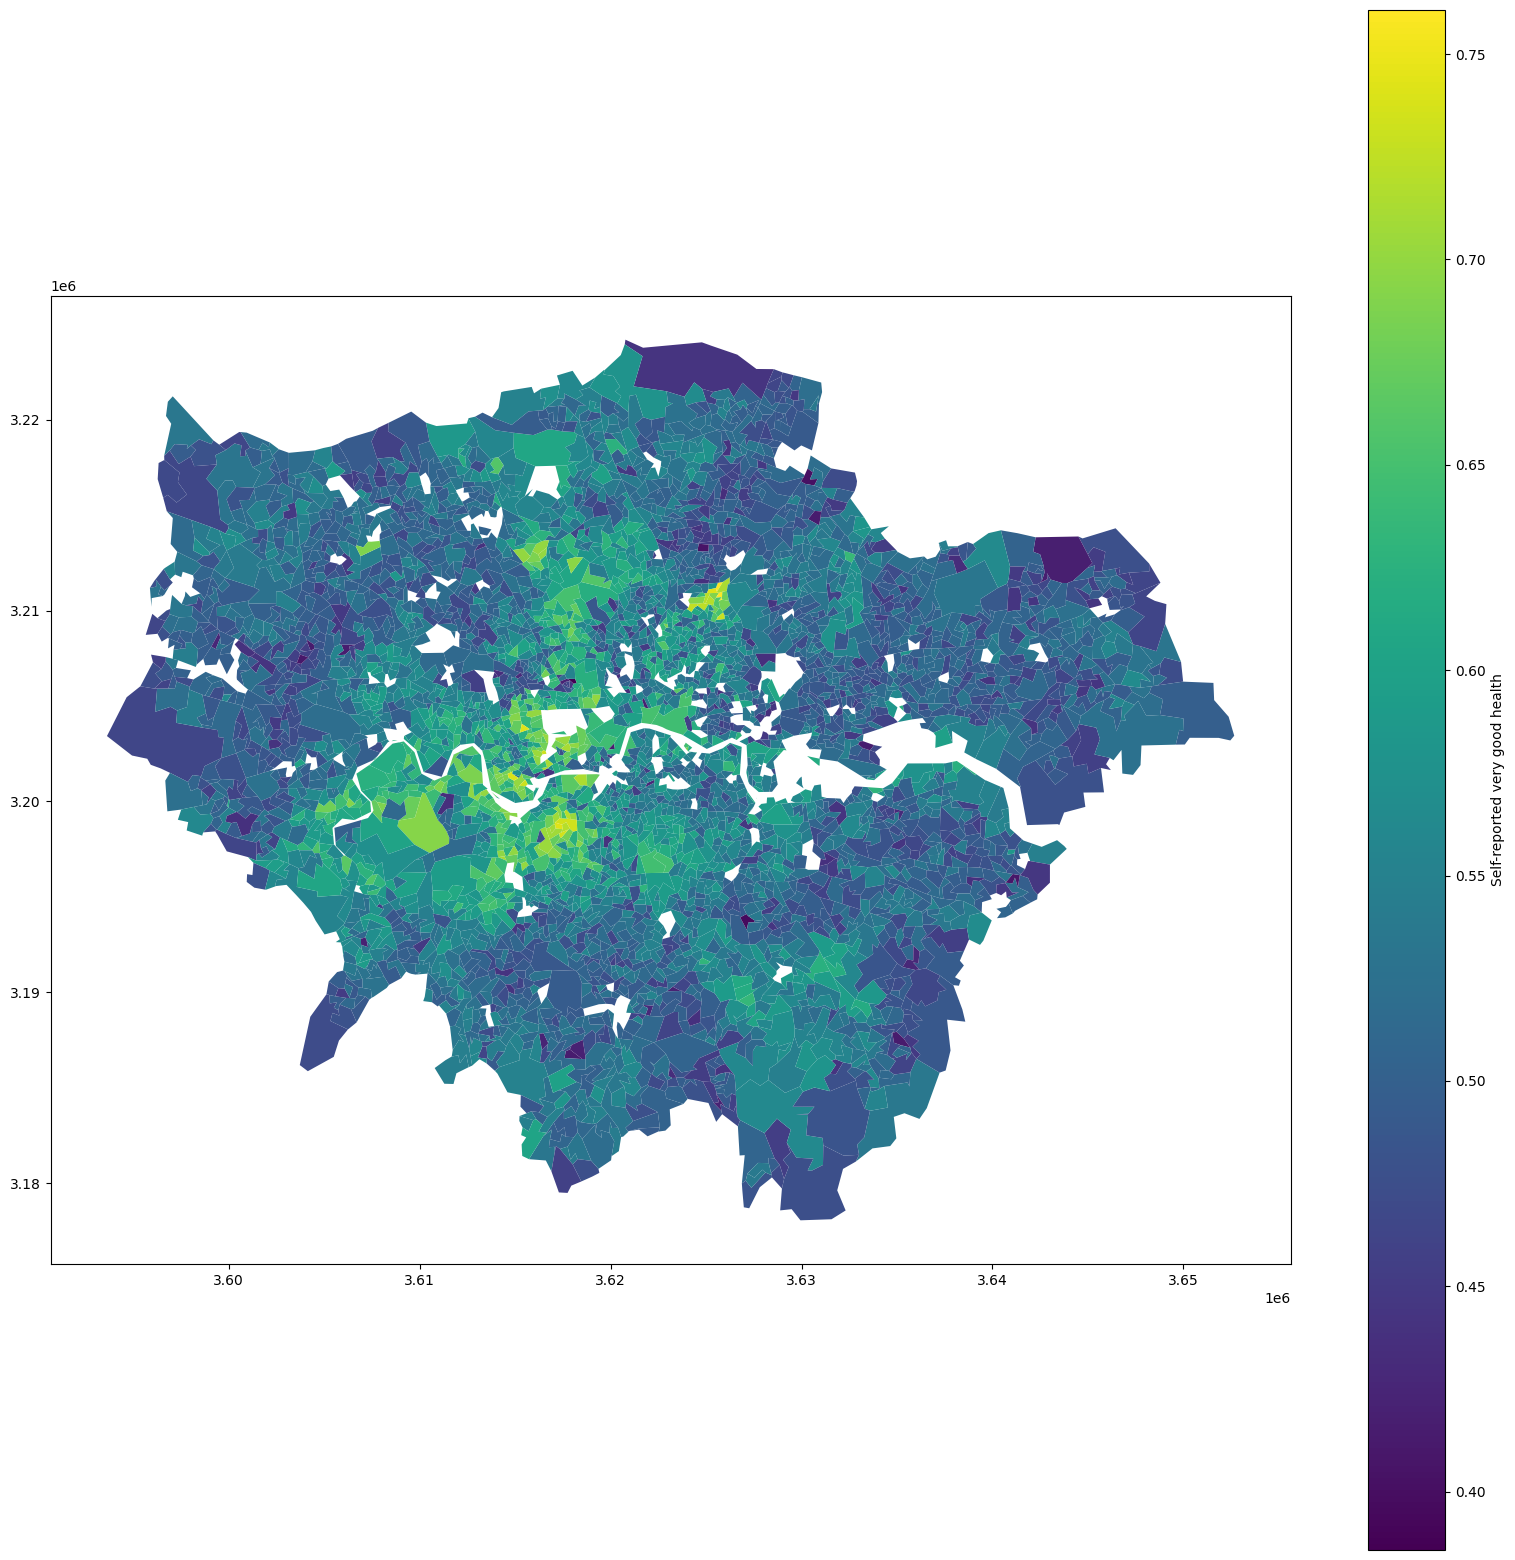

In [116]:
choropleth = df.plot(
    column="very_good_health",
    legend=True,
    figsize=[20, 20],
    cmap="viridis",
    legend_kwds={"label": "Self-reported very good health"},
).figure
choropleth.savefig("outputs/plots/choropleth.png")

## Calculate Moran's I

In [84]:
w = weights.KNN.from_dataframe(df, k=8)
moran = esda.esda.Moran(df["very_good_health"], w)

In [85]:
print(moran.I)

0.5623362955356597


## Plots Moran's I

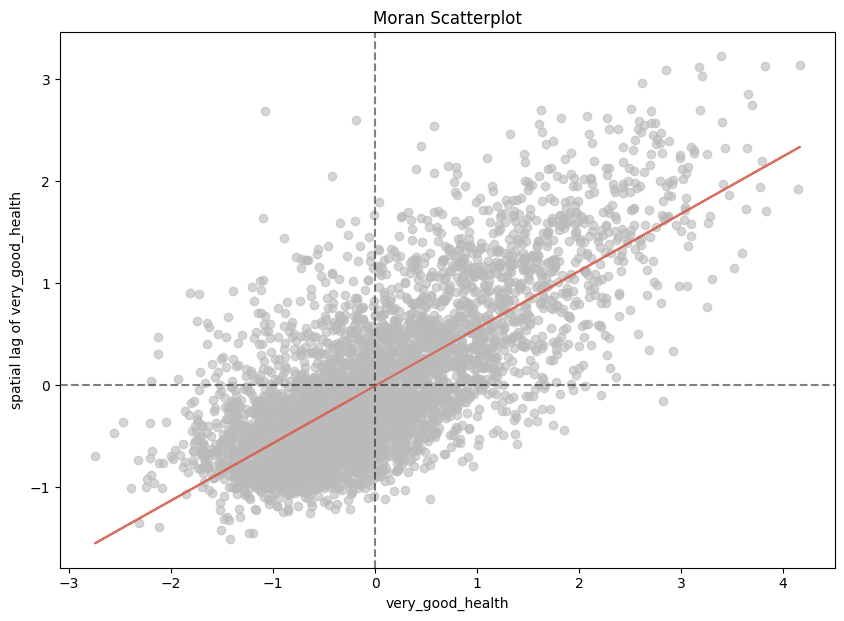

In [86]:
moran_axes = moran.plot_scatter()
moran_axes.set_xlabel("very_good_health")
moran_axes.set_ylabel("spatial lag of very_good_health")
moran_plt = moran_axes.get_figure()
moran_plt.set_figwidth(10)
moran_plt.set_figheight(10)
moran_plt.savefig("outputs/plots/moran.png")